Khusshi Dedhiaa
J019
BTech Data Science

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.columns = ['label', 'text']

In [7]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
stop_words = list(stopwords.words('english'))

In [9]:
def get_frequent_ngrams(texts, n=1):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [10]:
spam = df[df['label'] == 'spam']
ham = df[df['label'] == 'ham']

In [11]:
frequent_words_spam = get_frequent_ngrams(spam['text'], 1)
frequent_bigrams_spam = get_frequent_ngrams(spam['text'], 2)
frequent_trigrams_spam = get_frequent_ngrams(spam['text'], 3)

In [12]:
print(f'Frequent words: \n {frequent_words_spam}')
print(f'Frequent bigrams: \n {frequent_bigrams_spam}')
print(f'Frequent trigrams: \n {frequent_trigrams_spam}')


Frequent words: 
 [('call', 355), ('free', 224), ('txt', 163), ('ur', 144), ('mobile', 127), ('text', 125), ('stop', 121), ('claim', 113), ('reply', 104), ('www', 98)]
Frequent bigrams: 
 [('co uk', 49), ('please call', 46), ('po box', 24), ('1000 cash', 23), ('guaranteed call', 23), ('prize guaranteed', 22), ('national rate', 20), ('selected receive', 19), ('send stop', 19), ('every week', 19)]
Frequent trigrams: 
 [('prize guaranteed call', 21), ('suite342 2lands row', 15), ('reply call 08000930705', 14), ('land line claim', 14), ('private 2003 account', 13), ('2003 account statement', 13), ('guaranteed 1000 cash', 12), ('camcorder reply call', 12), ('shows 800 un', 12), ('800 un redeemed', 12)]


In [13]:
frequent_words_ham = get_frequent_ngrams(ham['text'], 1)
frequent_bigrams_ham = get_frequent_ngrams(ham['text'], 2)
frequent_trigrams_ham = get_frequent_ngrams(ham['text'], 3)

In [14]:
def create_wordcloud(text):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

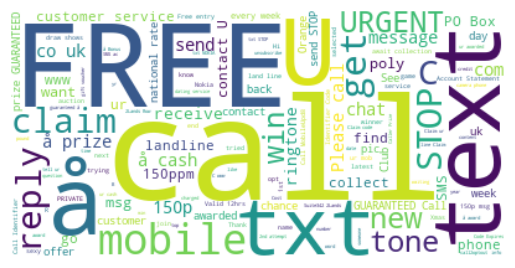

In [15]:
create_wordcloud(spam['text'])

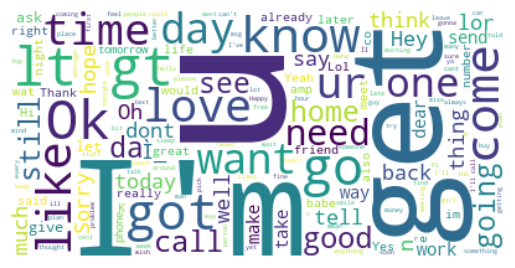

In [16]:
create_wordcloud(ham['text'])

bag of words

In [17]:
le = LabelEncoder()
le.fit_transform(df['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
vectorizer = CountVectorizer(stop_words=stop_words)
x_bow = vectorizer.fit_transform(df['text'])
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_bow, y, test_size=0.2)

In [20]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
y_pred = model.predict(X_test)
f1_bow = f1_score(y_test, y_pred)

In [22]:
print('F1-score - Bag-of-Words:', f1_bow)

F1-score - Bag-of-Words: 0.9347079037800687


Tf-IDF vectors

In [23]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
x_tfidf = tfidf_vectorizer.fit_transform(df['text'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2)


In [25]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred = model.predict(X_test)
f1_tfidf = f1_score(y_test, y_pred)

print('F1-score - Tf-IDF:', f1_tfidf)

F1-score - Tf-IDF: 0.9


In [27]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Khusshi
[nltk_data]     Dedhiaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Khusshi
[nltk_data]     Dedhiaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Khusshi
[nltk_data]     Dedhiaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Khusshi
[nltk_data]     Dedhiaa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [28]:
lemmatizer = WordNetLemmatizer()

In [29]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [re.sub(r'\b\w+@\w+\.\w+\b', '', token) for token in tokens]
    tokens = [re.sub(r'http\S+|www\S+', '', token) for token in tokens]
    tokens = [re.sub(r'<.*?>', '', token) for token in tokens]
    tokens = [re.sub(r'\d+', '', token) for token in tokens]
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [30]:
df.head()

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n grea...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think go usf life around though


In [31]:
x_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['cleaned_text'])
X_train, X_test, y_train, y_test = train_test_split(x_tfidf_preprocessed, y, test_size=0.2)


In [32]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred = model.predict(X_test)
f1_tfidf_preprocessed = f1_score(y_test, y_pred)

print('F1-score - Tf-IDF with preprocessing:', f1_tfidf_preprocessed)

F1-score - Tf-IDF with preprocessing: 0.8782287822878229


In [34]:
print('F1-score - Bag-of-Words:', f1_bow)
print('F1-score - Tf-IDF:', f1_tfidf)
print('F1-score - Tf-IDF with preprocessing:', f1_tfidf_preprocessed)

F1-score - Bag-of-Words: 0.9347079037800687
F1-score - Tf-IDF: 0.9
F1-score - Tf-IDF with preprocessing: 0.8782287822878229
